## CountVectorizer
- 한글에도 적용?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text_data = ["오늘은 날씨가 매우 춥다", "내일 점심 뭐 먹지", "내일 공부 해야겠다", "오늘은 점심 먹고 공부해야지"]

cnt_vect = CountVectorizer()
cnt_vect.fit(text_data)
print(cnt_vect.vocabulary_)

{'오늘은': 7, '날씨가': 2, '매우': 4, '춥다': 9, '내일': 3, '점심': 8, '먹지': 6, '공부': 0, '해야겠다': 10, '먹고': 5, '공부해야지': 1}


In [ ]:
for text in text_data:
  sentence = [text]
  print(cnt_vect.transform(sentence).toarray())

[[0 0 1 0 1 0 0 1 0 1 0]]
[[0 0 0 1 0 0 1 0 1 0 0]]
[[1 0 0 1 0 0 0 0 0 0 1]]
[[0 1 0 0 0 1 0 1 1 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_data = ["오늘은 날씨가 매우 춥다", "내일 점심 뭐 먹지", "내일 공부 해야겠다", "오늘은 점심 먹고 공부해야지"]

cnt_vect = TfidfVectorizer()
cnt_vect.fit(text_data)
print(cnt_vect.vocabulary_)

for text in text_data:
  sentence = [text]
  print(cnt_vect.transform(sentence).toarray())

{'오늘은': 7, '날씨가': 2, '매우': 4, '춥다': 9, '내일': 3, '점심': 8, '먹지': 6, '공부': 0, '해야겠다': 10, '먹고': 5, '공부해야지': 1}
[[0.         0.         0.52547275 0.         0.52547275 0.
  0.         0.41428875 0.         0.52547275 0.        ]]
[[0.         0.         0.         0.52640543 0.         0.
  0.66767854 0.         0.52640543 0.         0.        ]]
[[0.61761437 0.         0.         0.48693426 0.         0.
  0.         0.         0.         0.         0.61761437]]
[[0.         0.55528266 0.         0.         0.         0.55528266
  0.         0.43779123 0.43779123 0.         0.        ]]


## 구글 코랩에서 KoNLPy 설치
- 다음 3가지 명령어만 실행하면 끝


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install --target=$my_path konlpy

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/

- 동작확인

In [ ]:
import konlpy
from konlpy.tag import Okt
okt = Okt()

text = '한글 자연어 처리 매우 재미있음.'
print(okt.morphs(text))
print(okt.morphs(text,stem = True))

['한글', '자연어', '처리', '매우', '재미있음', '.']
['한글', '자연어', '처리', '매우', '재미있다', '.']


In [ ]:
print(okt.nouns(text))

['한글', '자연어', '처리', '매우']


## 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 필요한 모듈 불러오기
- 한글 텍스트 데이터 분석을 위한 라이브러리 불러온다.

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

## 데이터셋 확인
- 각 데이터 파일 크기를 확인한다.


In [ ]:
DATA_IN_PATH = '/content/drive/MyDrive/Colab Notebooks/2023/human/data_in/'
print('파일 크기 : \n')

for file in os.listdir(DATA_IN_PATH):
  if 'txt' in file:
    print(file.ljust(30) + str(os.path.getsize(DATA_IN_PATH + file) / 1000000) + ' MB') 

파일 크기 : 

ratings_test.txt              4.893335 MB
ratings_train.txt             14.628807 MB
ratings.txt                   19.515078 MB


### 데이터 불러오기
- ratings_train.txt 파일 불러오기


In [ ]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', 
                         header=0, 
                         delimiter='\t')
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


- 전체 학습 데이터의 갯수 확인

In [ ]:
train_data.shape

(150000, 3)

In [ ]:
train_length = train_data['document'].astype('str').apply(len)
train_length

0         19
1         33
2         17
3         29
4         61
          ..
149995    19
149996    13
149997    31
149998    27
149999    24
Name: document, Length: 150000, dtype: int64

### 히스토그램 시각화

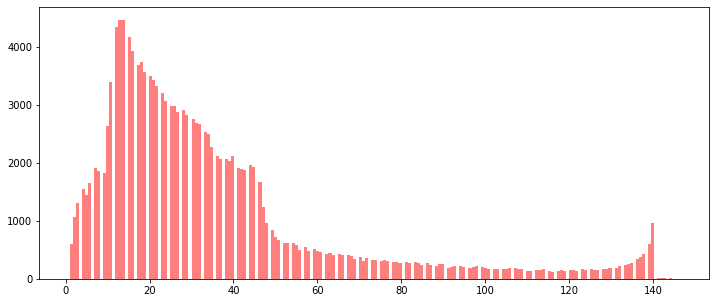

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(train_length, 
        bins = 200,
        alpha = 0.5,
        color='r',
        label = 'word')
plt.show()

### 박스플롯


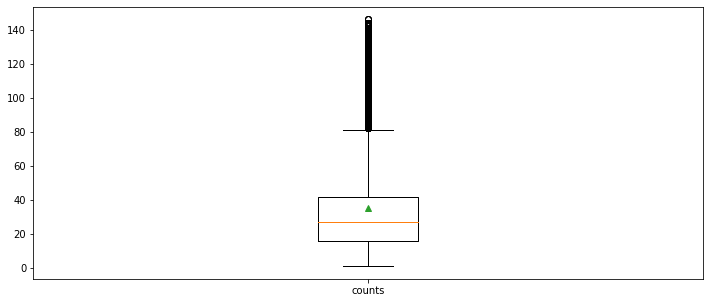

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(train_length, labels=['counts'], showmeans = True)
plt.show()

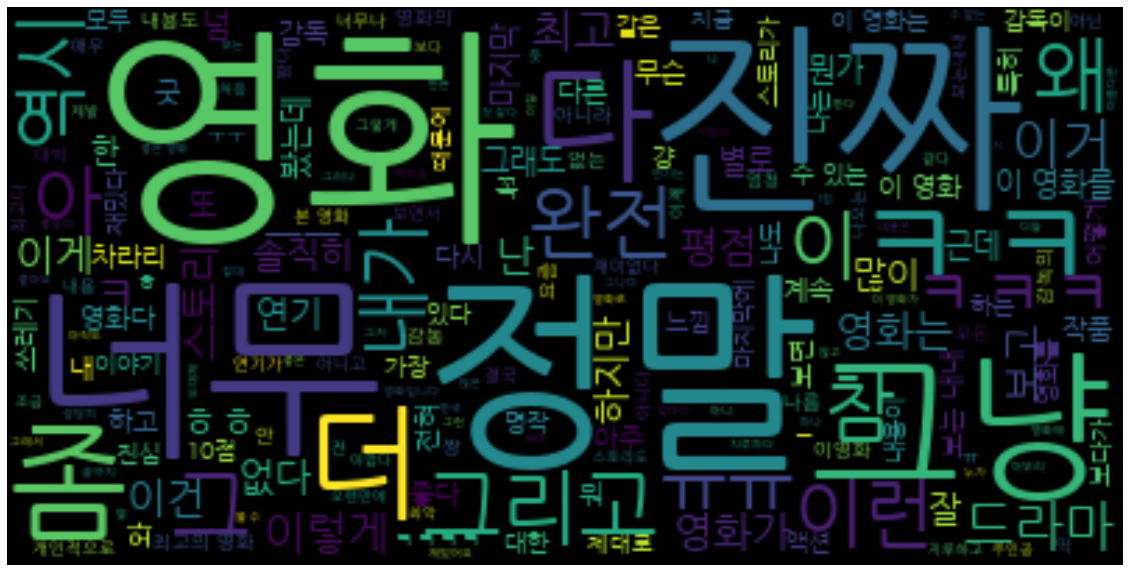

In [ ]:
train_review = [review for review in train_data['document'] if type(review) is str]
wordcloud = WordCloud(font_path=DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 데이터의 긍정 또는 부정

In [ ]:
print('긍정 리뷰 갯수 : {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수 : {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수 : 74827
부정 리뷰 갯수 : 75173


In [ ]:
train_data['document'][:10]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
5        막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                원작의 긴장감을 제대로 살려내지못했다.
7    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
8                               액션이 없는데도 재미 있는 몇안되는 영화
9        왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
Name: document, dtype: object

In [ ]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x : '?' in x))
full_stop = np.mean(train_data['document'].astype(str).apply(lambda x : '.' in x))
print(qmarks * 100)
print(full_stop * 100)

8.247333333333334
51.76333333333333


## 텍스트 데이터 전처리
- 텐서플로 라이브러리 및 KoNLPy 라이브러리도 같이 불러온다.


In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt

# 텐서플로 라이브러리
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

- 정규표현식을 활용해서 한글자만 추출하도록 한다.


In [ ]:
train_data['document'][:4]

0                  아 더빙.. 진짜 짜증나네요 목소리
1    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                    너무재밓었다그래서보는것을추천한다
3        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
Name: document, dtype: object

In [ ]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ|\\s]", "", train_data['document'][4])
review_text

'사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다'

- 특수문자 모두 제거

In [ ]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
review_text

['사이',
 '몬페',
 '그',
 '의',
 '익살스럽다',
 '연기',
 '가',
 '돋보이다',
 '영화',
 '스파이더맨',
 '에서',
 '늙다',
 '보이다',
 '하다',
 '커스틴',
 '던스트',
 '가',
 '너무나도',
 '이쁘다',
 '보이다']

- 불용어 제거

In [ ]:
stop_words = set(['은', '는', '이', '가', '그', '의', '에서'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['사이', '몬페', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '늙다', '보이다', '하다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다']


- 하나의 전처리 함수를 만들기

In [ ]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
    return word_review

- 시간이 오래 걸려서 시간 측정 함수

In [ ]:
import time 
import datetime 

def bench_mark(start):
  sec = time.time() - start 
  times = str(datetime.timedelta(seconds=sec)).split(".")
  times = times[0]

  print(times)

In [ ]:
start = time.time()

stop_words = [ '은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가
        
bench_mark(start)

0:11:32


In [ ]:
clean_train_review[:3] # 앞의 3개의 데이터 확인

In [ ]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )
clean_test_review = []

start = time.time()

for review in test_data['document']:
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

bench_mark(start)